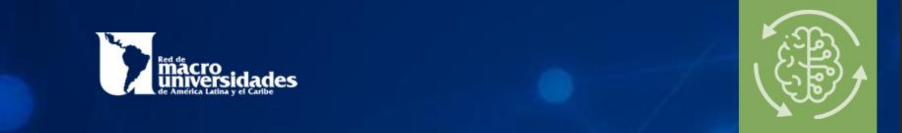


---
<center>

💻 **INTELIGENCIA ARTIFICIAL - LIDeSIA -FCEFyN - UNC**

</center>


---

Autor:.

Directora:    Dra. Inga. Laura Diaz Dávila.
###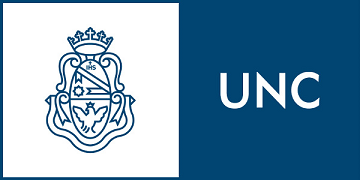

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Base de datos
fashion_mnist = keras.datasets.fashion_mnist

(train_inputs, train_labels), (test_inputs, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#Clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_inputs.shape

(60000, 28, 28)

In [ ]:
test_inputs.shape

(10000, 28, 28)

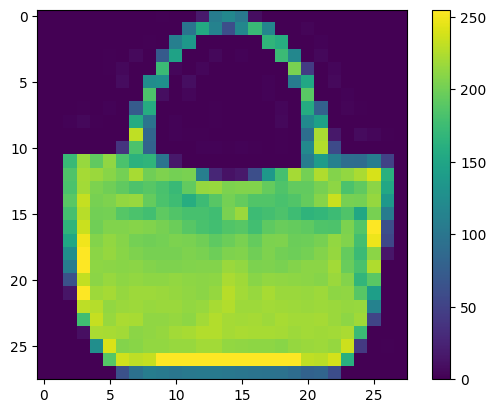

In [ ]:
plt.figure()
plt.imshow(train_inputs[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Normalizacion
train_inputs = train_inputs / 255.0

test_inputs = test_inputs / 255.0

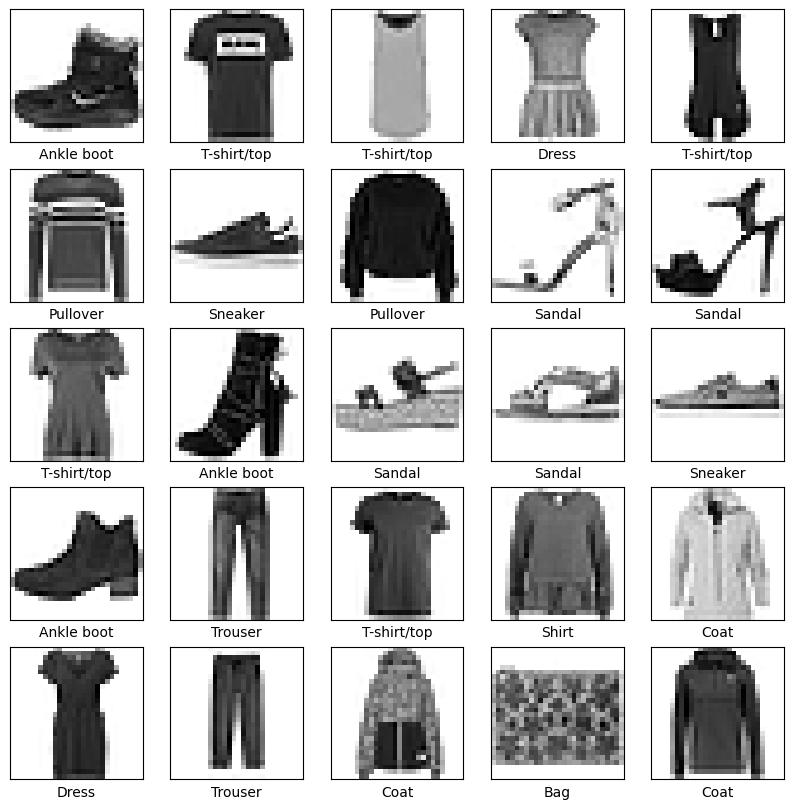

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Creacion del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_inputs, train_labels,
                  epochs=5,
                  batch_size=100,
                  shuffle=True,
                  validation_data=(test_inputs, test_labels))

Epoch 1/5
600/600 [==============================] - 10s 14ms/step - loss: 0.5433 - accuracy: 0.8121 - val_loss: 0.4522 - val_accuracy: 0.8422
Epoch 2/5
600/600 [==============================] - 6s 10ms/step - loss: 0.4016 - accuracy: 0.8569 - val_loss: 0.4042 - val_accuracy: 0.8571
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: 0.3610 - accuracy: 0.8709 - val_loss: 0.3894 - val_accuracy: 0.8601
Epoch 4/5
600/600 [==============================] - 3s 6ms/step - loss: 0.3346 - accuracy: 0.8798 - val_loss: 0.3651 - val_accuracy: 0.8680
Epoch 5/5
600/600 [==============================] - 3s 5ms/step - loss: 0.3136 - accuracy: 0.8857 - val_loss: 0.3479 - val_accuracy: 0.8750


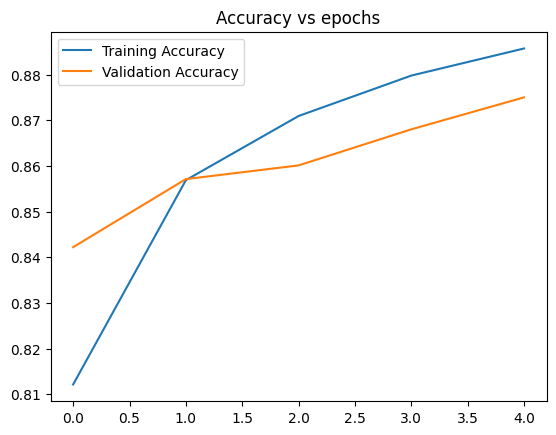

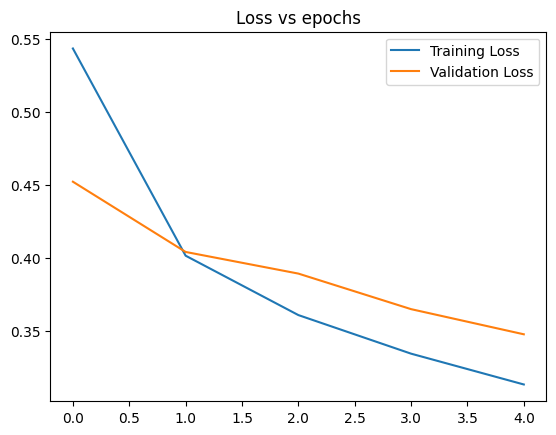

In [ ]:
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss']);

In [ ]:
predictions = model.predict(test_inputs)

313/313 [==============================] - 1s 2ms/step


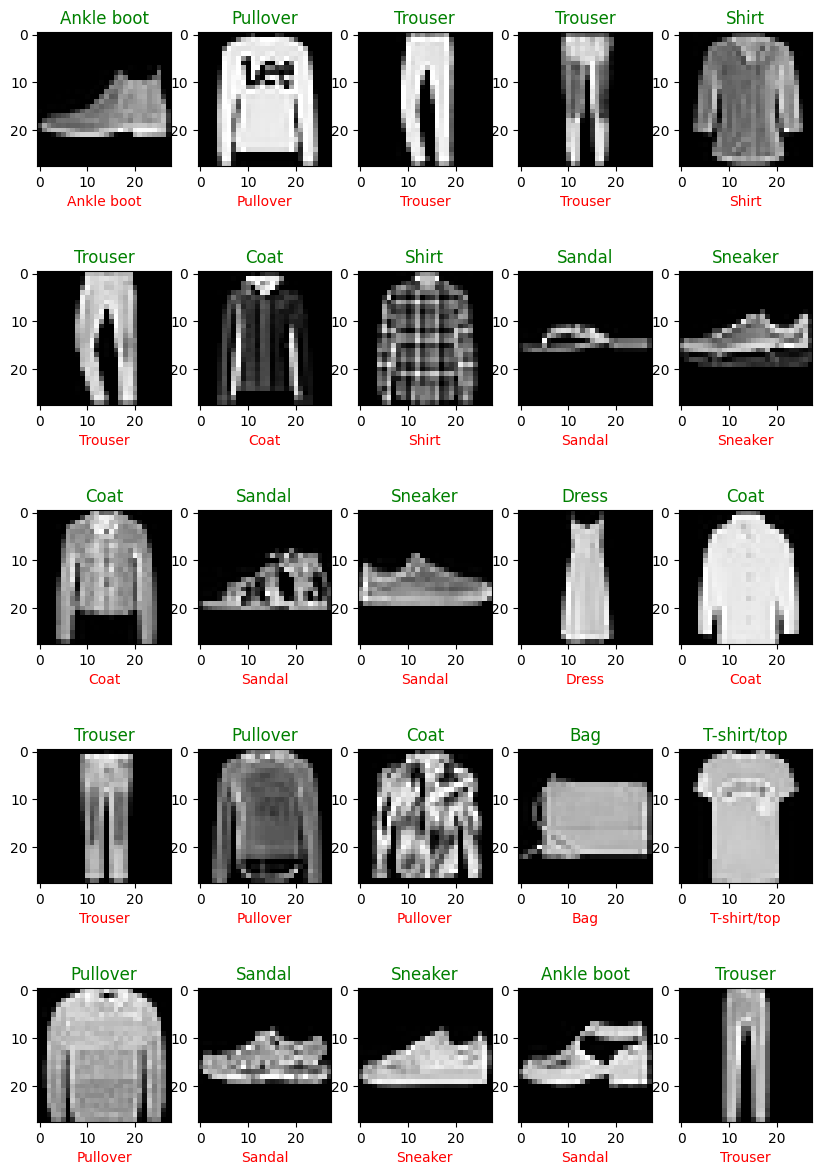

In [ ]:
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)

    plt.imshow(test_inputs[i].reshape(28,28), 'gray')
    plt.title(class_names[test_labels[i]], color='g')
    plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

plt.show()

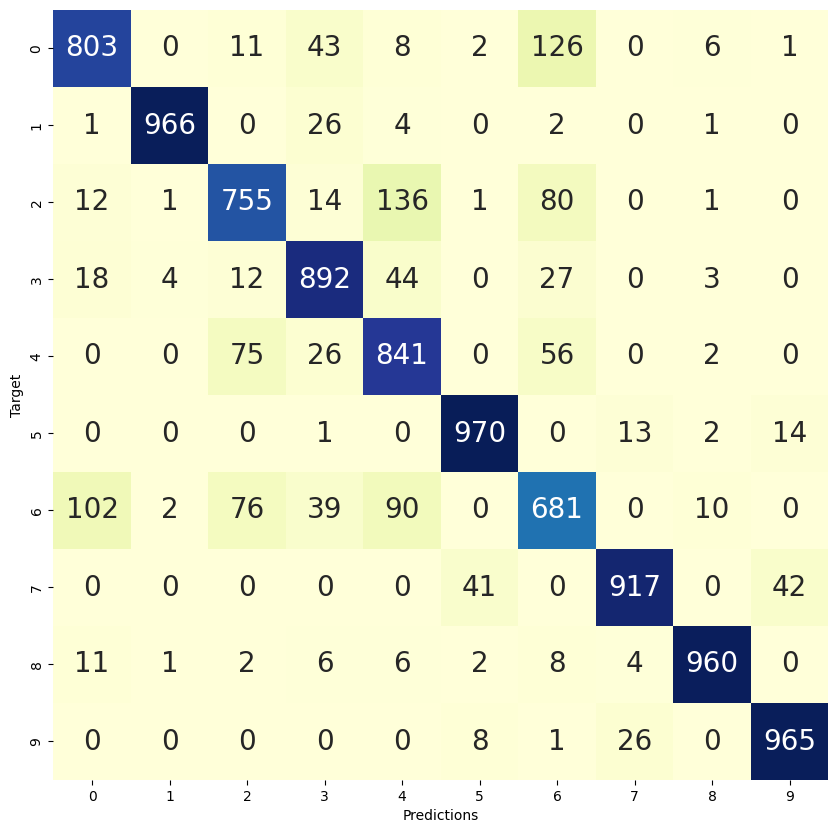

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf=MLPClassifier(solver='adam',hidden_layer_sizes=128, max_iter=5)

In [ ]:
flatten_train_inputs=[]

for i in train_inputs:

  flatten_train_inputs.append(i.flatten())

In [ ]:
clf.fit(flatten_train_inputs, train_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=128, max_iter=5)

In [ ]:
flatten_test_inputs=[]

for i in test_inputs:

  flatten_test_inputs.append(i.flatten())

In [ ]:
predictions=clf.predict(flatten_test_inputs)

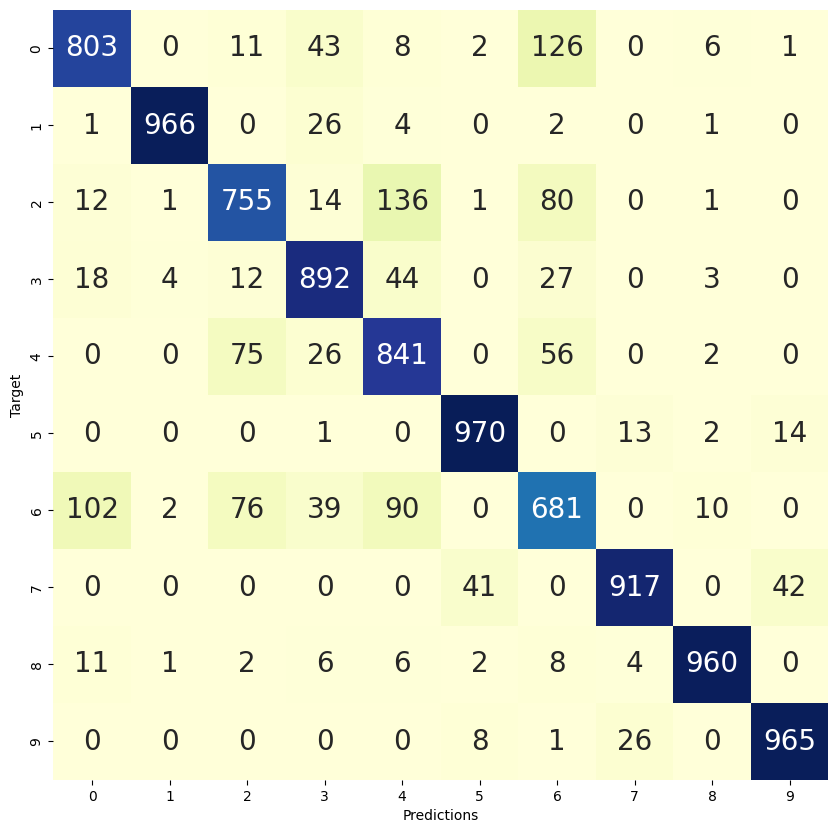

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False,  fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

In [ ]:
clf.score(flatten_test_inputs, test_labels)

0.8662